# Do the EDA on the given dataset: Lung cancer, and extract some useful information from this.

## Dataset Description:

Lung cancer is one of the most prevalent and deadly forms of cancer worldwide, presenting significant challenges in early detection and effective treatment. To aid in the global effort to understand and combat this disease, we are excited to introduce our comprehensive Lung Cancer Dataset.

link: https://drive.google.com/file/d/1NilhULC0qdiorakl02u5U_kRTPa6KSUI/view?usp=drive_link

## Importing necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## loading the dataset

In [4]:
df = pd.read_csv("/content/dataset.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## shape of the dataframe

In [6]:
df.shape


(3000, 16)

## Information about the dataframe

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

In [8]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,55.169000,1.491000,1.514000,1.494000,1.499000,1.509667,1.489667,1.506667,1.497333,1.491333,1.510667,1.488000,1.489667,1.498667
std,14.723746,0.500002,0.499887,0.500047,0.500082,0.499990,0.499977,0.500039,0.500076,0.500008,0.499970,0.499939,0.499977,0.500082
min,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,55.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,68.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,80.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


## Checking for null/missing values in the dataset

In [9]:
df.isnull().sum()


,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC_DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


`Observation & Inference:`
- no null values

## Checking for duplicate values

In [10]:
df.duplicated().sum()

2

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

## EDA

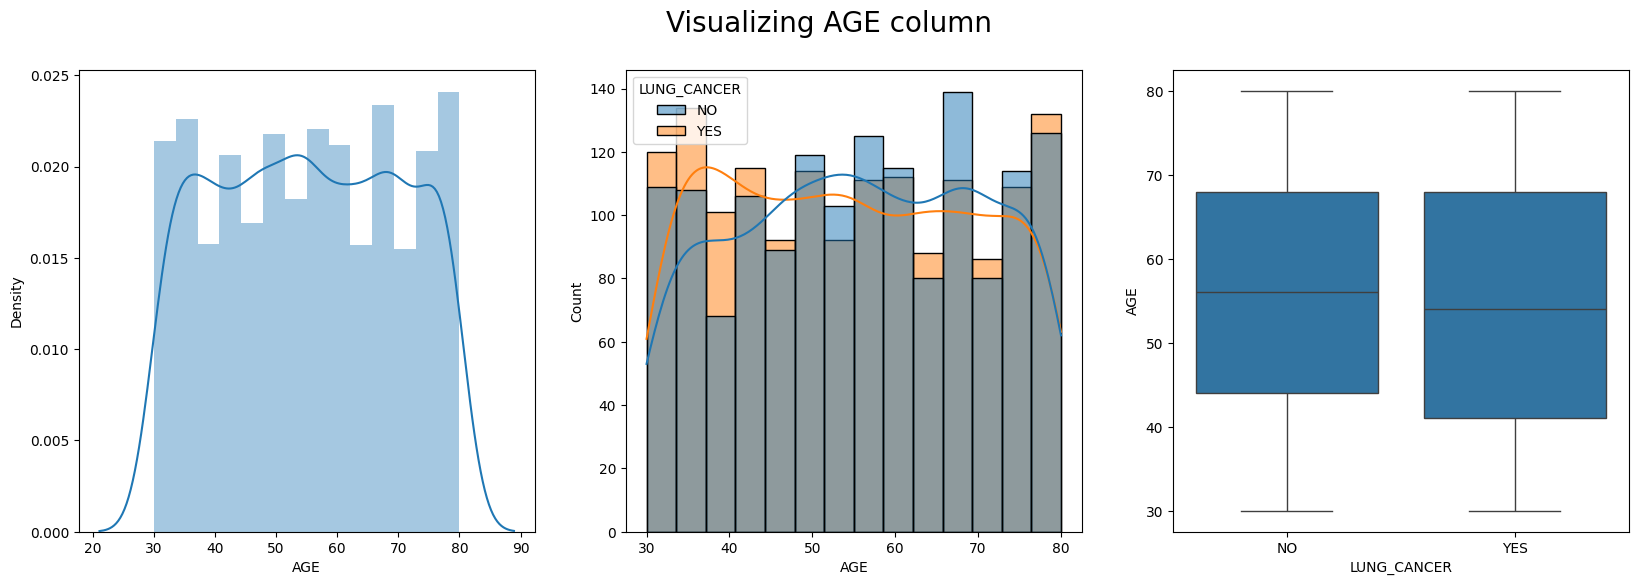

In [13]:

fig,ax = plt.subplots(1,3,figsize=(20,6))
sns.distplot(df['AGE'],ax=ax[0])
sns.histplot(data =df,x='AGE',ax=ax[1],hue='LUNG_CANCER',kde=True)
sns.boxplot(x=df['LUNG_CANCER'],y=df['AGE'],ax=ax[2])
plt.suptitle("Visualizing AGE column",size=20)
plt.show()


`Observation and insight:`
- the age feature follows a normal distribution.

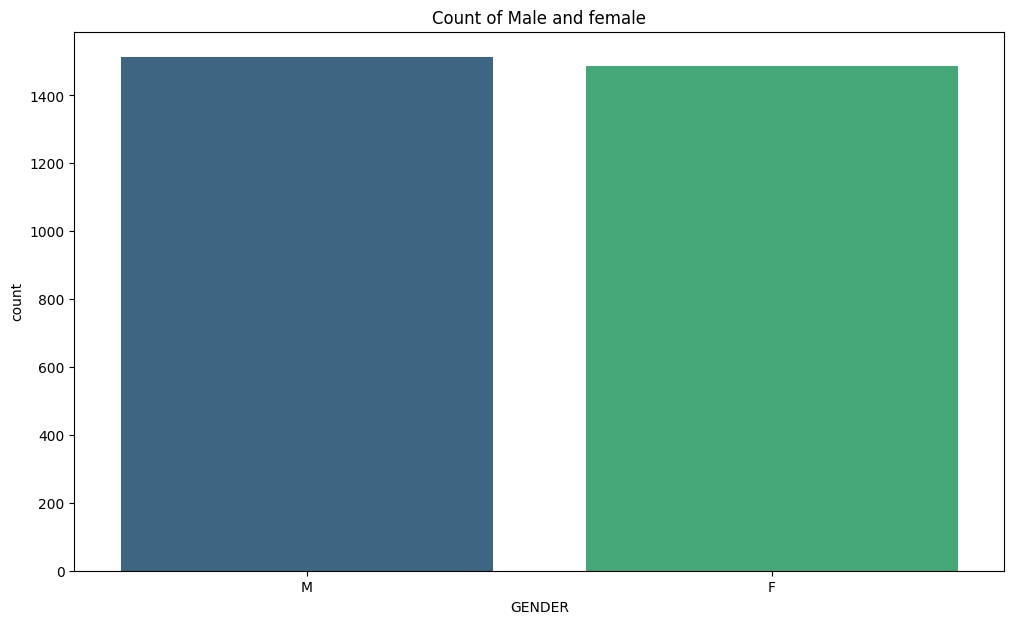

In [14]:
plt.figure(figsize=(12,7))
sns.countplot(data=df,x="GENDER",palette='viridis')
plt.title("Count of Male and female")
plt.show()

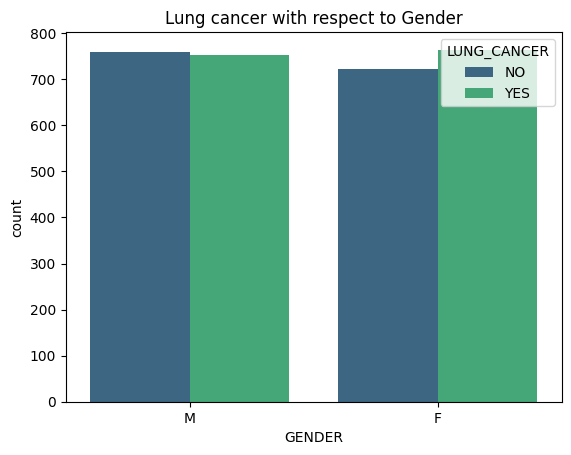

In [15]:
sns.countplot(data=df ,x="GENDER",hue="LUNG_CANCER",palette='viridis')
plt.title("Lung cancer with respect to Gender")
plt.show()

In [16]:
df_lung_cancer =df.LUNG_CANCER.value_counts()
df_lung_cancer

,count
LUNG_CANCER,
YES,1517
NO,1481


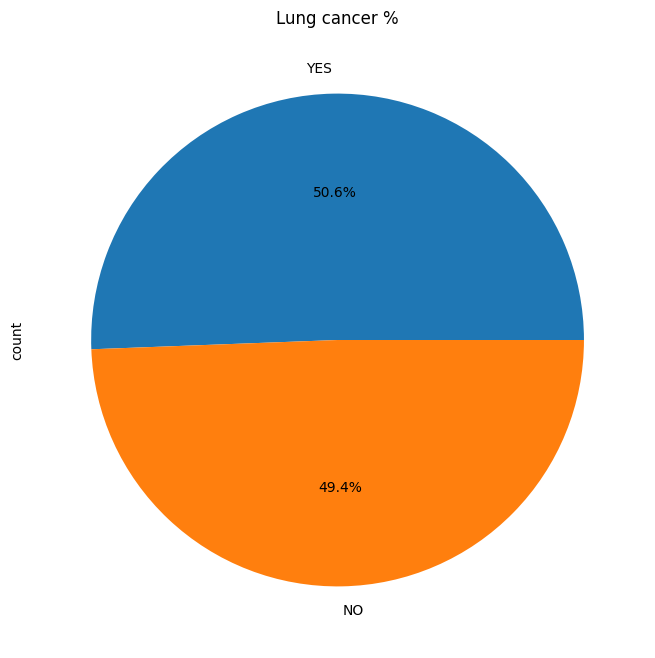

In [17]:
plt.figure(figsize=(12,8))
df_lung_cancer.plot.pie(x=df_lung_cancer ,labels=df_lung_cancer.index,autopct ="%1.1f%%")
plt.title("Lung cancer %")
plt.show()

`Observation and Insight`
- 50.6% people has lung cancer.
- 49.4% people has lung cancer.

In [18]:
df_lung_cancer_counter = df.groupby("GENDER")["LUNG_CANCER"].value_counts().unstack()
df_lung_cancer_counter

LUNG_CANCER,NO,YES
GENDER,,
F,722,764
M,759,753


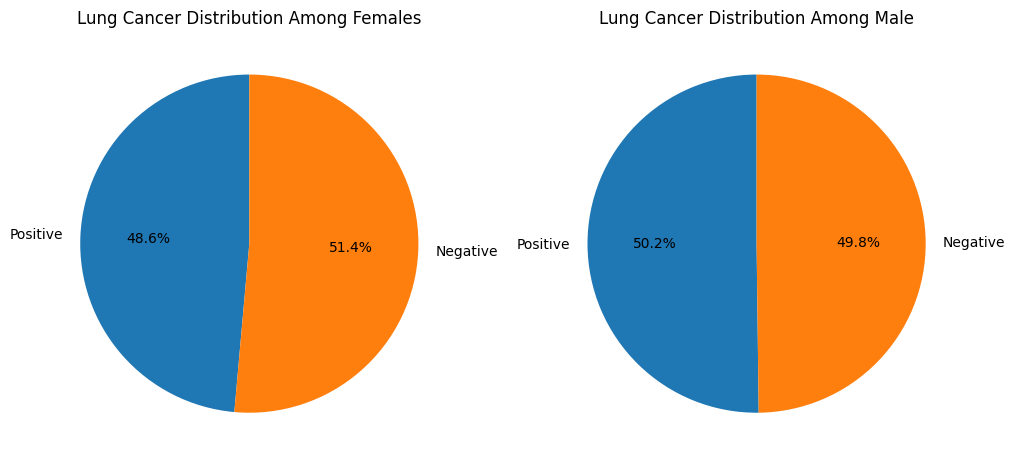

In [19]:
fig,ax =plt.subplots(1,2,figsize= (12,6))
ax[0].pie(df_lung_cancer_counter.iloc[0],labels=["Positive","Negative"],autopct="%1.1f%%",startangle=90)
ax[0].set_title('Lung Cancer Distribution Among Females')

ax[1].pie(df_lung_cancer_counter.iloc[1],labels=["Positive","Negative"],autopct="%1.1f%%",startangle=90)
ax[1].set_title('Lung Cancer Distribution Among Male')

plt.show()

`Observation:`
- men have higher chance of getting lung cancer

In [20]:
df_smoking_causes_lung_cancer = df.groupby("SMOKING")["LUNG_CANCER"].value_counts().unstack()
df_smoking_causes_lung_cancer

LUNG_CANCER,NO,YES
SMOKING,,
1,764,761
2,717,756


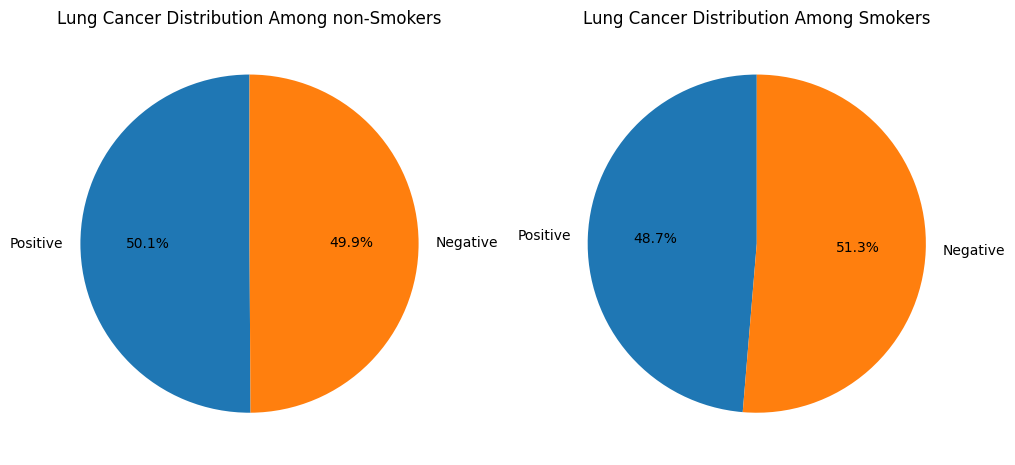

In [21]:
fig,ax =plt.subplots(1,2,figsize= (12,6))
ax[0].pie(df_smoking_causes_lung_cancer.iloc[0],labels=["Positive","Negative"],autopct="%1.1f%%",startangle=90)
ax[0].set_title('Lung Cancer Distribution Among non-Smokers')

ax[1].pie(df_smoking_causes_lung_cancer.iloc[1],labels=["Positive","Negative"],autopct="%1.1f%%",startangle=90)
ax[1].set_title('Lung Cancer Distribution Among Smokers')

plt.show()

`Observation and Insight:`
- Yes Smoking Causes Lung Cancer.

In [22]:
df_short_breath_cancer =df.groupby("SHORTNESS_OF_BREATH")["LUNG_CANCER"].value_counts().unstack()


In [23]:
df_short_breath_cancer


LUNG_CANCER,NO,YES
SHORTNESS_OF_BREATH,,
1,757,779
2,724,738


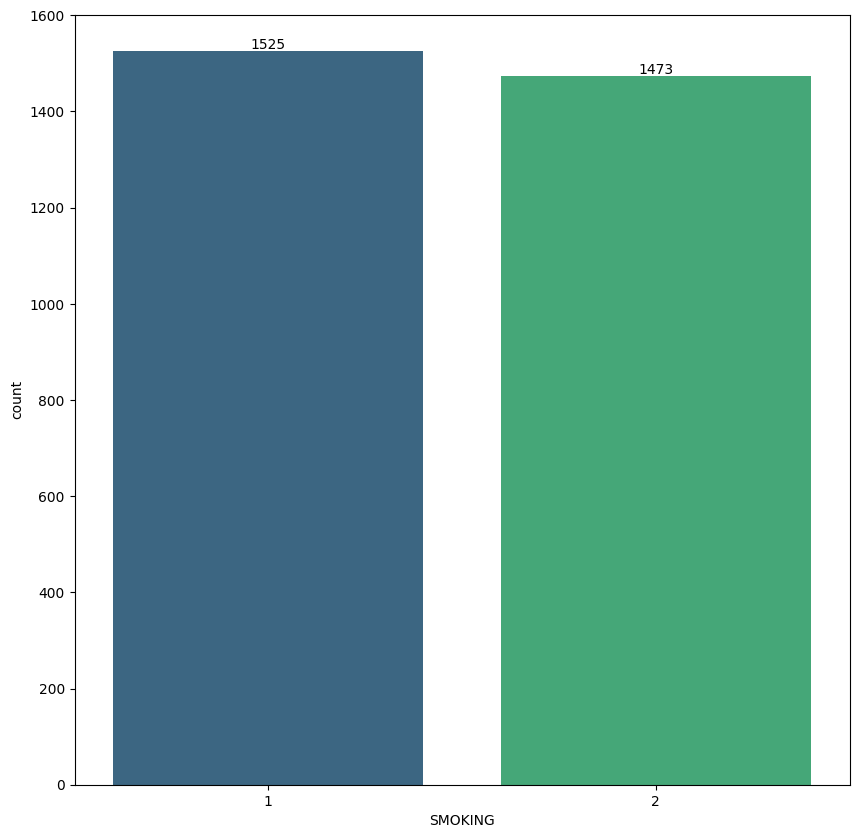

In [24]:
# Smokers count
plt.figure(figsize=(10,10))
ax =sns.countplot(x="SMOKING", data=df,palette='viridis')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

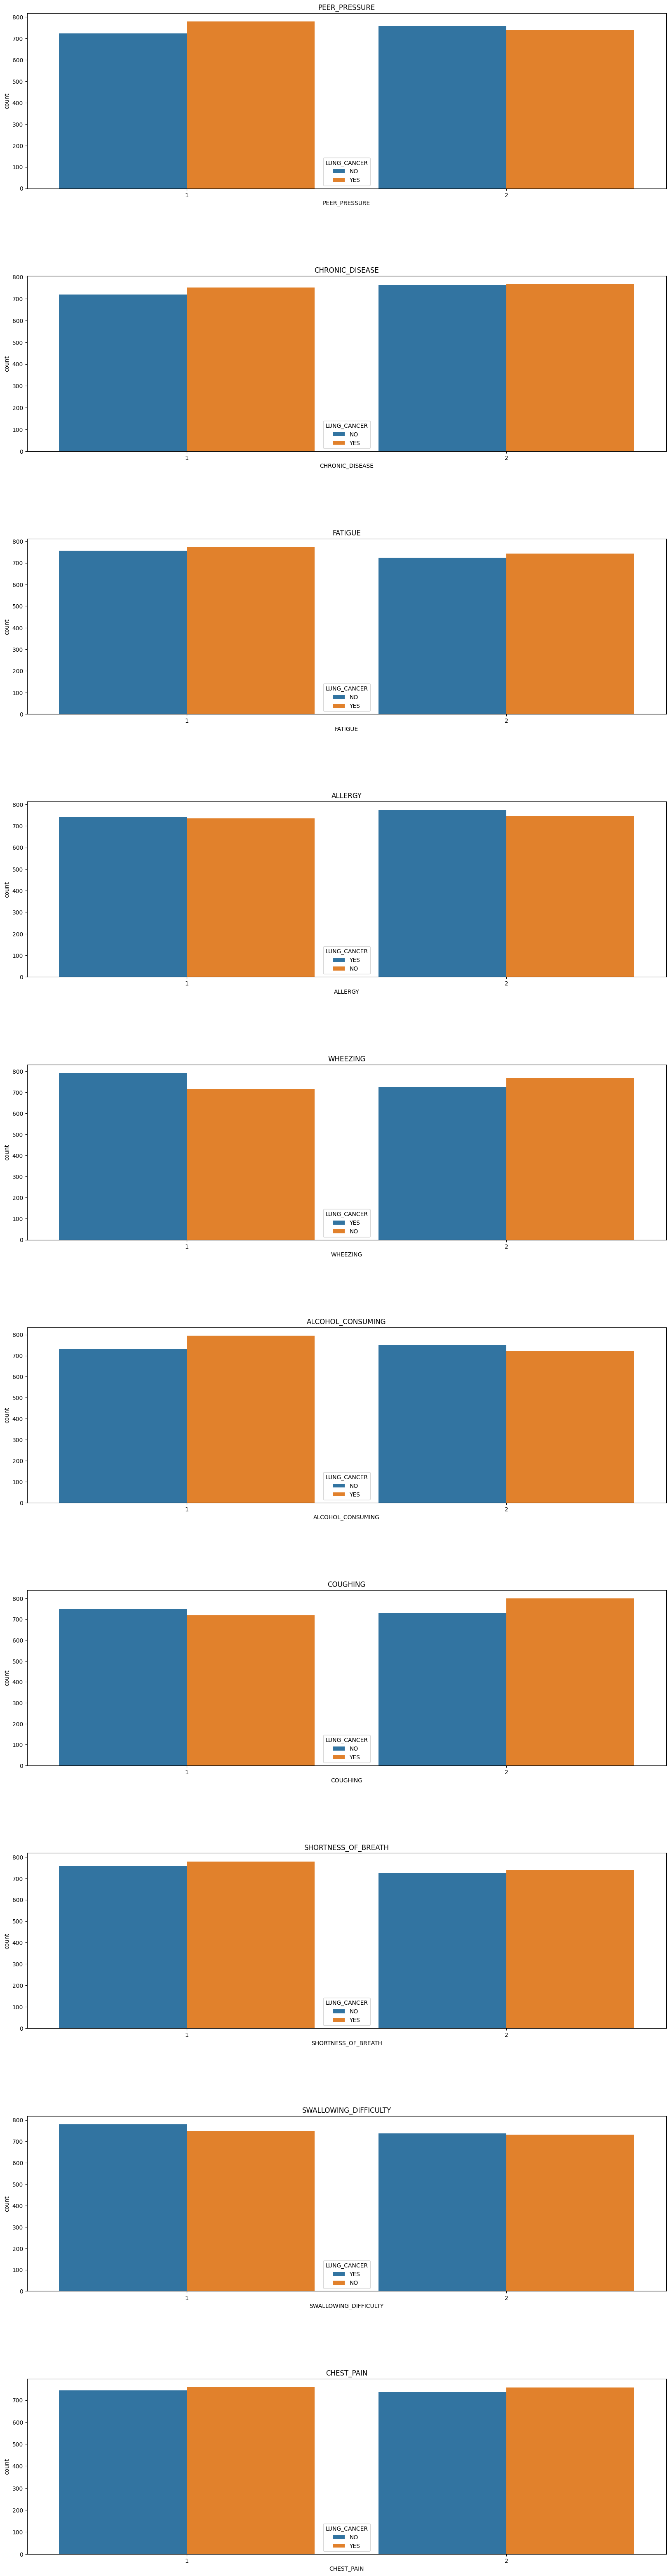

In [25]:
columns =df[['PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN']]

fig,ax =plt.subplots(nrows=10 ,ncols=1,figsize=(20,80))
fig.subplots_adjust(hspace=0.5)

for i,col in enumerate(columns):
    sns.countplot(x=col ,data=df,ax=ax[i],hue="LUNG_CANCER")

    ax[i].set_title(col)

plt.show()

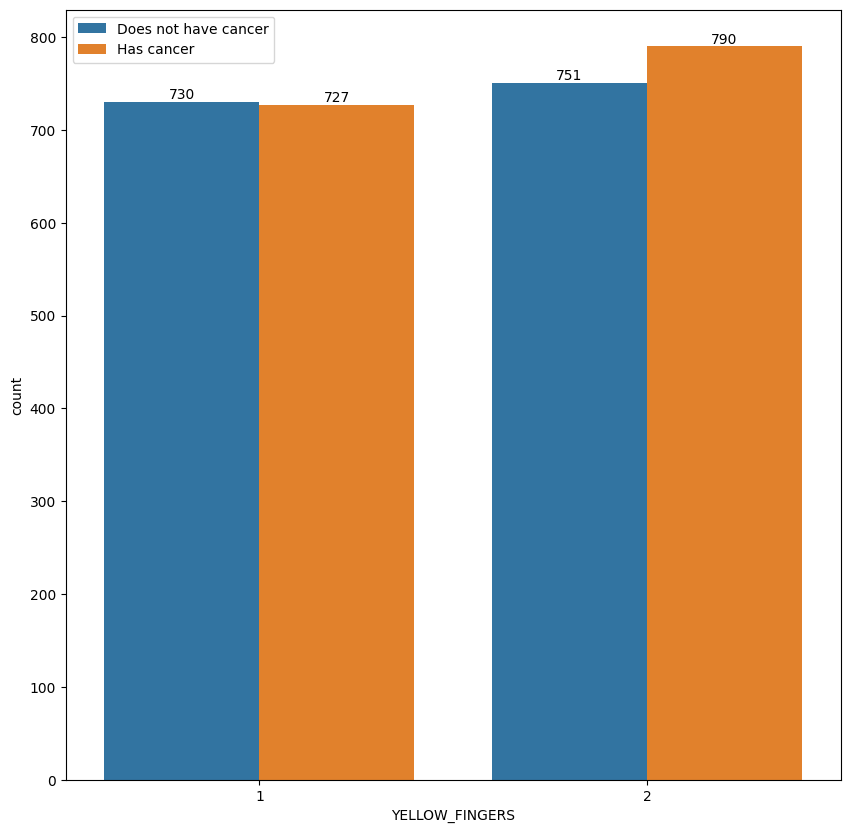

In [26]:
# YELLOW_FINGERS count
plt.figure(figsize=(10,10))
ax =sns.countplot(x="YELLOW_FINGERS", data=df,hue="LUNG_CANCER")

for i in ax.containers:
    ax.bar_label(i)

plt.legend(["Does not have cancer","Has cancer"])
plt.show()

`Observation and Insight`

After plotting multiple countplots for the different features, we can see that most surveyors said yes to having symptoms such as yellow fingers, coughing, fatigue, shortness of breath and chest pain meaning these are the primary/more crucial symptoms that people should look out for as they may be at risk of having cancer.